# Generate AUC Result Graph
Code that amalgamates each model's mean AUC curve into the same graph.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

roc_curve_path = "../Model/GAT_Training/Model Train and Eval/ROC Curves"

# lightly modified sample code from 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
def create_mean_AUC(fig_title, roc_curve_path, models):
    fig, ax = plt.subplots(figsize=(7, 5.5), dpi=80)
    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    for model_name in models:
        path = roc_curve_path + '/' + model_name + '/'
        mean_tpr = np.genfromtxt(path + 'mean_tpr.csv', delimiter=',')
        mean_fpr = np.genfromtxt(path + 'mean_fpr.csv', delimiter=',')
        #mean_tpr[-1] = 1.0
        mean_auc = np.genfromtxt(path + 'mean_auc.csv', delimiter=',')
        std_auc = np.genfromtxt(path + 'std_auc.csv', delimiter=',')
        ax.plot(
            mean_fpr,
            mean_tpr,
            # color="b",
            label=model_name + r" Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=2,
            alpha=0.8,
        )
    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title=fig_title,
    )
    ax.legend(loc="lower right")
    plt.show()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


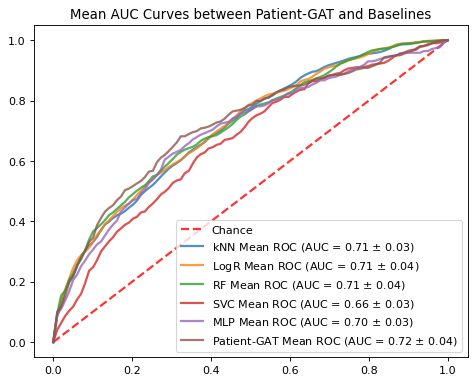

In [2]:
fig_title = 'Mean AUC Curves between Patient-GAT and Baselines'
models = ['kNN', 'LogR', 'RF', 'SVC', 'MLP', 'Patient-GAT']
create_mean_AUC(fig_title, roc_curve_path, models)

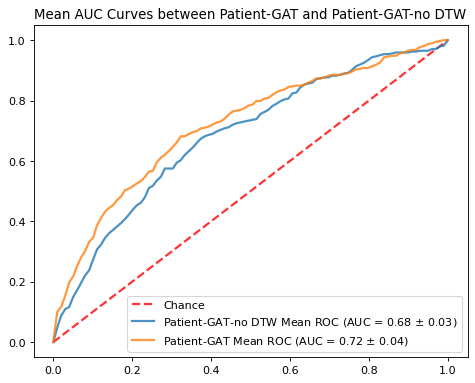

In [4]:
fig_title = 'Mean AUC Curves between Patient-GAT and Patient-GAT-no DTW'
models = ['Patient-GAT-no DTW', 'Patient-GAT']
create_mean_AUC(fig_title, roc_curve_path, models)